In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTING THE DATASET
df = pd.read_csv(r"D:\datasets\ML DATASETS\archive\train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

As we can see that the Postal Code entries are missing, we will have to fill them with something, so as to make the data workable.

In [5]:
# FILLING NULL VALUES
df['Postal Code'].fillna(0, inplace = True)
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

C:\Users\apsr0\AppData\Local\Temp\ipykernel_16456\43625990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace = True)


In [6]:
# CHECKING FOR DUPLICATES
if df.duplicated().sum() > 0: 
    print('Duplicates exist.')
else:
    print('No duplicates exist.')

No duplicates exist.


In [7]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [8]:
# TYPES OF CUSTOMERS
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [9]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment' : 'Type of Customers'})

In [10]:
print(number_of_customers)

  Type of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


([<matplotlib.patches.Wedge at 0x203108b5650>,
 [Text(-0.07082912490696024, 1.0977172837597642, 'Consumer'),
  Text(-0.5228074564626142, -0.9678183525161589, 'Corporate'),
  Text(0.9321462195039758, -0.5840406025820858, 'Home Office')],
 [Text(-0.03863406813106921, 0.5987548820507803, '52.1%'),
  Text(-0.28516770352506227, -0.5279009195542684, '30.1%'),
  Text(0.508443392456714, -0.3185676014084104, '17.8%')])

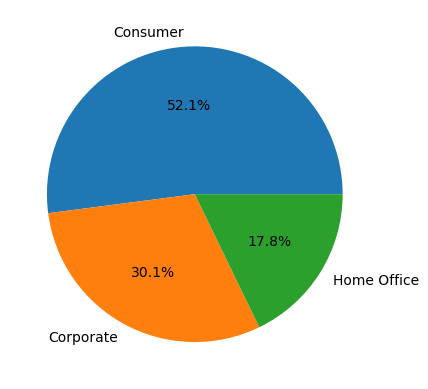

In [11]:
# PIE CHART FOR THE CUSTOMER AND THEIR TYPES
plt.pie(number_of_customers['count'], labels = number_of_customers['Type of Customers'], autopct = '%1.1f%%')

  Type of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


<BarContainer object of 3 artists>

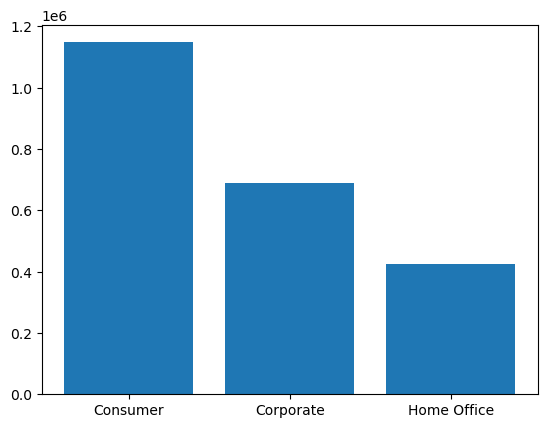

In [12]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns = {'Segment' : 'Type of Customer', 'Sales' : 'Total Sales'})

print(sales_per_segment)

plt.bar(sales_per_segment['Type of Customer'], sales_per_segment['Total Sales'])

In [13]:
plt.pie(sales_per_segment['Total Sales'], labels = sales_per_segment('Type of Customer'), autopct = '%1.1f%%')

TypeError: 'DataFrame' object is not callable

NOW WE WOULD TRY TO SEE THE DIFFERENT TYPES OF HIGH VALUE CUSTOMERS

In [14]:
df.head(3)   # DISPLAYING TOP 3 CUSTOMERS ACCORDING TO THE LIST

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


FOR SEEING CUSTOMERS ACCORDING TO THE FREQUENCY OF ORDERS

In [15]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

In [16]:
customers_order_frequency.rename(columns = {'Order ID' : 'Total Orders'}, inplace = True)

In [17]:
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] >= 1]

In [18]:
repeat_customers_sorted = repeat_customers.sort_values(by = 'Total Orders', ascending = False)

In [19]:
print(repeat_customers_sorted.head(12).reset_index(drop = True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    BM-11650           Brian Moss    Corporate            29


In [20]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

In [21]:
top_spenders = customer_sales.sort_values(by = 'Sales', ascending = False)

In [22]:
print(top_spenders.head(15).reset_index(drop = True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120
12    BM-11140        Becky Martin     Consumer  11789.630
13    SV-20365         Seth Vernon     Consumer  11470.950
14    CJ-12010     Caroline Jumper     Consumer  11164.974


INFORMATION FOR SHIPPING METHODS

In [23]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns = {'index' : 'Use Frequency', 'Ship Mode' : 'Mode of Shipment'})

print(shipping_model)

  Mode of Shipment  count
0   Standard Class   5859
1     Second Class   1902
2      First Class   1501
3         Same Day    538


In [24]:
plt.pie(shipping_model['Use Frequency'], labels = shipping_model['Mode of Shipment'], autopct = '%1.1f%%')

KeyError: 'Use Frequency'

INFORMATION WITH RESPECT TO GEOGRAPHICAL AREA

In [25]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns = {'index' : 'State', 'State' : 'Number of Customers'})

print(state.head(25))

   Number of Customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122
20            Maryland    105
21           Wisconsin    105
22            Delaware     93
23           Minnesota     89
24         Connecticut     82


In [26]:
city = df['City'].value_counts().reset_index()

print(city.head(25))

             City  count
0   New York City    891
1     Los Angeles    728
2    Philadelphia    532
3   San Francisco    500
4         Seattle    426
5         Houston    374
6         Chicago    308
7        Columbus    221
8       San Diego    170
9     Springfield    161
10         Dallas    156
11   Jacksonville    125
12        Detroit    115
13         Newark     92
14        Jackson     82
15       Columbia     81
16       Richmond     81
17         Aurora     68
18        Phoenix     63
19      Arlington     60
20    San Antonio     59
21          Miami     56
22     Louisville     54
23      Rochester     53
24     Long Beach     52


In [27]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

In [28]:
top_sales = state_sales.sort_values(by = 'Sales', ascending = False)

In [29]:
print(top_sales.head(10).reset_index(drop = True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [30]:
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values(by = 'Sales', ascending = False)
print(top_city_sales.head(10).reset_index(drop = True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


ANALYSIS ACCORDING TO THE PRODUCTS, PRODUCT CATEGORIES, ETC.

In [31]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [32]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [33]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by = 'Sub-Category', ascending = False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [34]:
# TOP PERFORMING SUB-CATEGORIES

subcategory_count_sales = df.groupby(['Category', 'Sub-Category']).nunique().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by = 'Sales', ascending = False)

print(subcategory_count_sales)

           Category Sub-Category  Row ID  Order ID  Order Date  Ship Date  \
6   Office Supplies      Binders    1492      1291         772        795   
2         Furniture  Furnishings     931       855         588        627   
16       Technology       Phones     876       803         566        595   
11  Office Supplies      Storage     832       764         552        560   
10  Office Supplies        Paper    1338      1163         721        757   
13       Technology  Accessories     756       702         505        526   
1         Furniture       Chairs     607       566         411        448   
5   Office Supplies          Art     785       720         522        551   
4   Office Supplies   Appliances     459       444         363        373   
3         Furniture       Tables     314       302         253        261   
7   Office Supplies    Envelopes     248       243         214        216   
0         Furniture    Bookcases     226       222         199        209   

In [35]:
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by = 'Sales', ascending = False)

print(top_product_category.reset_index(drop = True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


([<matplotlib.patches.Wedge at 0x20312ec2050>,
 [Text(0.44988564266575465, 1.0037942560720405, 'Technology'),
  Text(-1.0842320951134052, -0.18558222955335987, 'Furniture'),
  Text(0.6127885417845869, -0.9135043530588783, 'Office Supplies')],
 [Text(0.24539216872677524, 0.5475241396756584, '36.6%'),
  Text(-0.5913993246073119, -0.101226670665469, '32.2%'),
  Text(0.33424829551886553, -0.49827510166847905, '31.2%')])

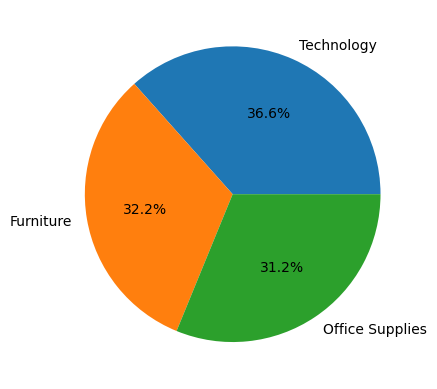

In [36]:
plt.pie(top_product_category['Sales'], labels = top_product_category['Category'], autopct = '%1.1f%%')

<BarContainer object of 17 artists>

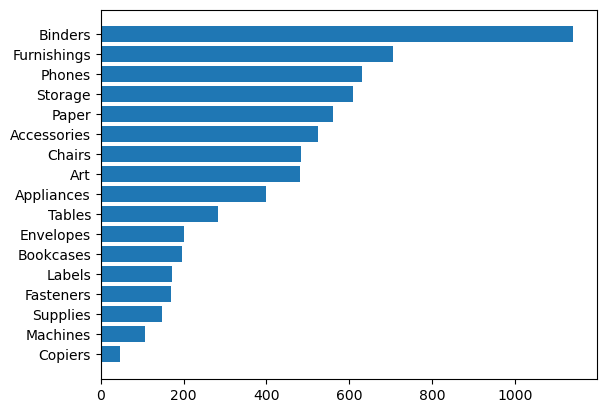

In [37]:
subcategory_count_sales = subcategory_count_sales.sort_values(by = 'Sales', ascending = True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])

WE WILL TRY TO SEE THE SALES WITH THE ORDER DATE AND YEAR

In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)

yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns = {'Order Date' : 'Year', 'Sales' : 'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


<BarContainer object of 4 artists>

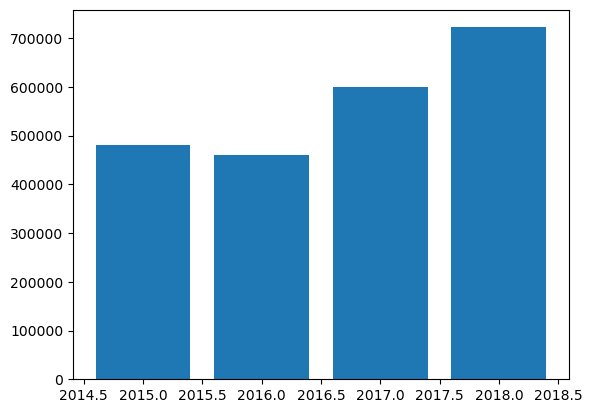

In [39]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

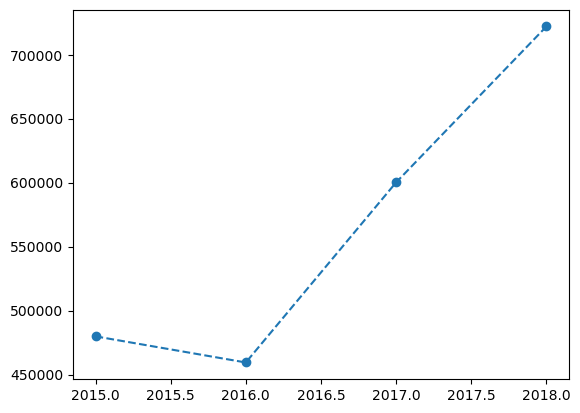

In [40]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker = 'o', linestyle = '--')

In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)

year_sales = df[df['Order Date'].dt.year == 2018]

quaterly_sales = year_sales.resample('QE', on = 'Order Date')['Sales'].sum()
quaterly_sales = quaterly_sales.reset_index()
quaterly_sales = quaterly_sales.rename(columns = {'Order Date' : 'Quater', 'Sales' : 'Total Sales'})

print(quaterly_sales)

      Quater  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


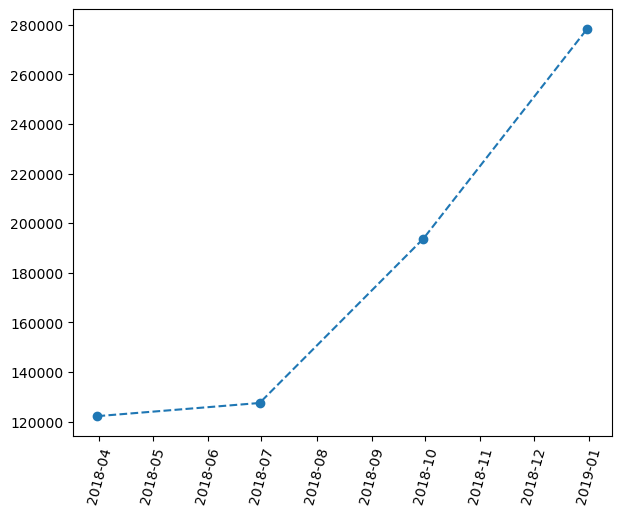

In [42]:
plt.plot(quaterly_sales['Quater'], quaterly_sales['Total Sales'], marker = 'o', linestyle = '--')

plt.tight_layout()
plt.xticks(rotation = 75)
plt.show()

FOR MONTHLY SALES

In [43]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
yearly_sales = df[df['Order Date'].dt.year == 2018]

monthly_sales = yearly_sales.resample('ME', on = 'Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns = {'Order Date' : 'Month', 'Sales' : 'Total Monthly Sales'})

print(monthly_sales)

        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


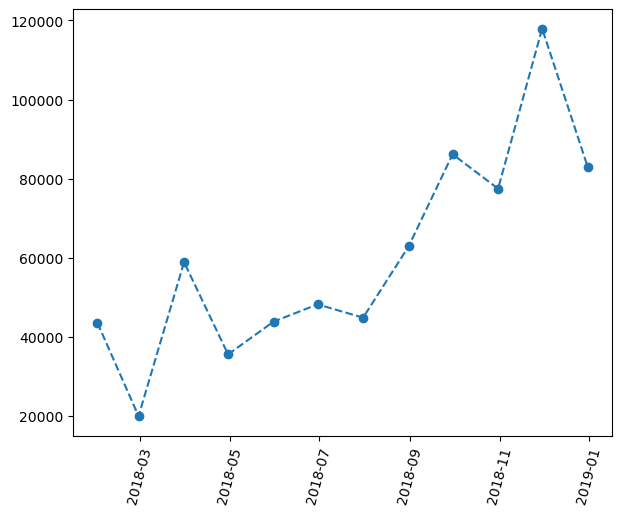

In [44]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker = 'o', linestyle = '--')

plt.tight_layout()
plt.xticks(rotation = 75)
plt.show()

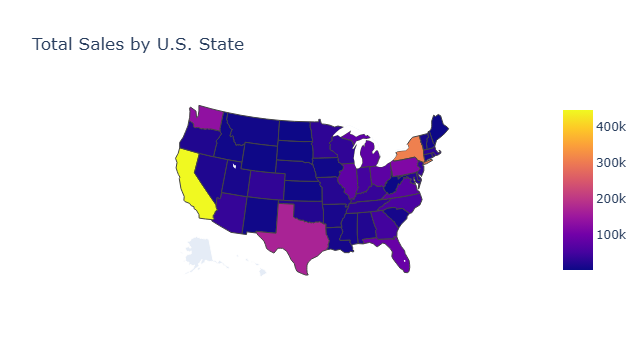

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize Plotly in Jupyter Notebook moe
import plotly.io as pio

# Creating mapping for all 50 American states
all_state_mapping = {
    'Alabama':'AL',
    'Alaska':'AK',
    'Arizona':'AZ',
    'Arkansas':'AR',
    'California':'CA',
    'Colorado':'CO',
    'Connecticut':'CT',
    'Delaware':'DE',
    'Florida':'FL',
    'Georgia':'GA',
    'Hawaii':'HI',
    'Idaho':'ID',
    'Illinois':'IL',
    'Indiana':'IN',
    'Iowa':'IA',
    'Kansas':'KS',
    'Kentucky':'KY',
    'Louisiana':'LA',
    'Maine':'ME',
    'Maryland':'MD',
    'Massachusetts':'MA',
    'Michigan':'MI',
    'Minnesota':'MN',
    'Mississippi':'MS',
    'Missouri':'MO',
    'Montana':'MT',
    'Nebraska':'NE',
    'Nevada':'NV',
    'New Hampshire':'NH',
    'New Jersey':'NJ',
    'New Mexico':'NM',
    'New York':'NY',
    'North Carolina':'NC',
    'North Dakota':'ND',
    'Ohio':'OH',
    'Oklahoma':'OK',
    'Oregon':'OR',
    'Pennsylvania':'PA',
    'Rhode Island':'RI',
    'South Carolina':'SC',
    'South Dakota':'SD',
    'Tennessee':'TN',
    'Texas':'TX',
    'Utah':'UT',
    'Vermont':'VT',
    'Virginia':'VA',
    'Washington':'WA',
    'West Virginia':'WV',
    'Wisconsin':'WI',
    'Wyoming':'WY'
}

# Add the abbreviation column to the dataframe
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data = go.Choropleth(
    locations = sum_of_sales['Abbreviation'],
    locationmode = 'USA-states',
    z = sum_of_sales['Sales'],
    hoverinfo = 'location+z',
    showscale = True
))

fig.update_geos(projection_type = 'albers usa')
fig.update_layout(
    geo_scope = 'usa',
    title = 'Total Sales by U.S. State'
)

fig.show()